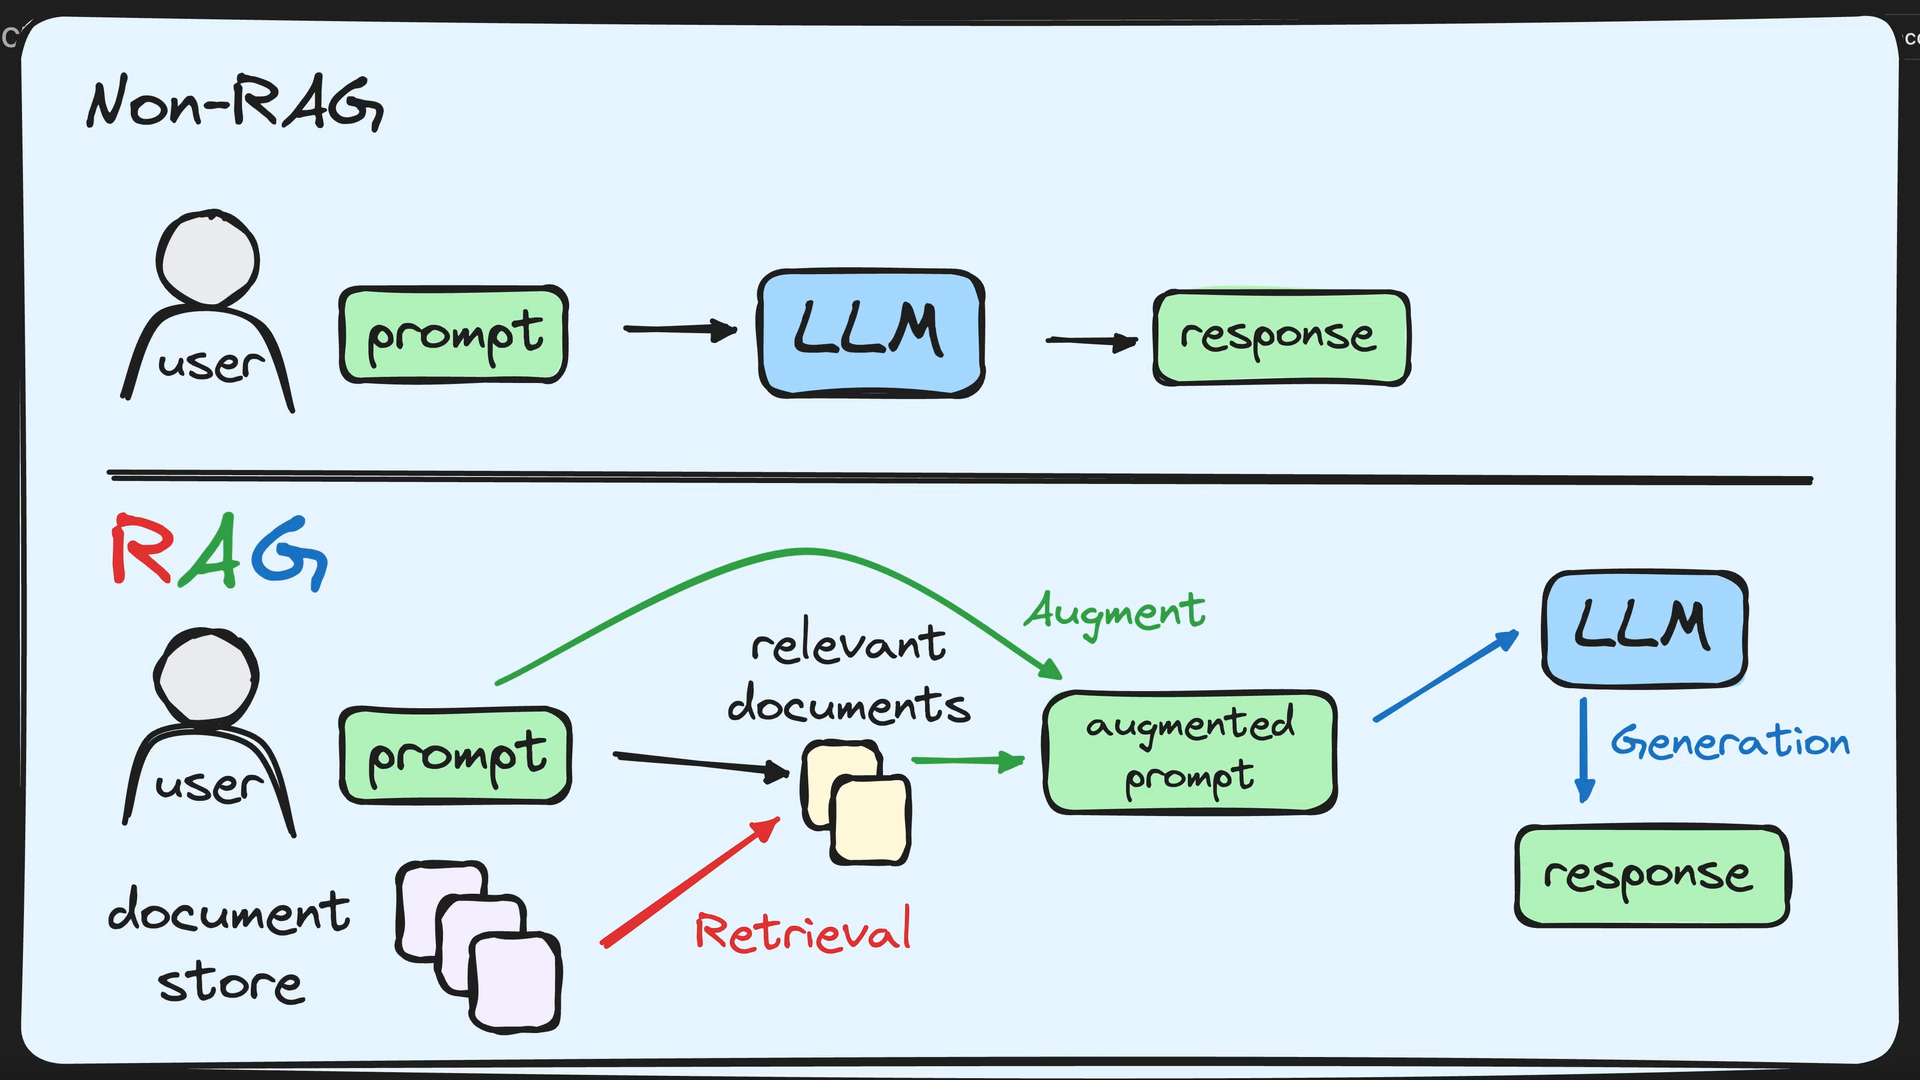

In [1]:
# Requirements
# pip install faiss-cpu
# pip install langchain-community
# pip install sentence-transformers

In [2]:
# Import the libraries
import os
import google.generativeai as genai
from langchain.vectorstores import FAISS  # This will be the vector database
from langchain_community.embeddings import HuggingFaceEmbeddings # To perform word embeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter # This for chunking
from pypdf import PdfReader
import faiss

In [3]:
# Step 1: Configure the models

# Configure LLM
key = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=key)
llm_model = genai.GenerativeModel('gemini-2.5-flash-lite')

# Configure Embedding Model
embedding_model = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

C:\Users\gaura\AppData\Local\Temp\ipykernel_5832\2764464244.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')


In [9]:
# Step 2 : Loading the PDF file and extract the text
loaded_file = PdfReader('RAGChatbot.pdf')

raw_text = ''
for page in loaded_file.pages:
    text_only = page.extract_text()
    if text_only:
        raw_text += text_only


In [14]:
# Step 3 : Chunking (Create Chunks)
splitter = RecursiveCharacterTextSplitter(chunk_size=300,chunk_overlap = 50)
chunks = splitter.split_text(raw_text)

In [15]:
len(chunks)

16

In [18]:
# Step 4: Create FAISS Vector Store
vector_store = FAISS.from_texts(chunks,embedding_model)

In [28]:
# Step 5: Configure retriever
retriever = vector_store.as_retriever(search_kwargs={"k":5})

In [29]:
# Step 6: Take the query:
query = "Show me the steps to proceed with this project."

In [30]:
# Step 7 : Retrieval (R)
retrived_docs = retriever.get_relevant_documents(query=query)

In [31]:
context = ' '.join([doc.page_content for doc in retrived_docs])
context

'Live Demo: https://gemini-rag2025.streamlit.app/ \n \nProblem Statement \nAcross industries such as legal, finance, healthcare, and construction, professionals are \nrequired to extract insights from massive document repositories—contracts, product \nmanuals, policies, reports, regulations, and emails. 4. Ask questions in natural language \n5. Get contextual answers generated by Google Gemini 1.5 Flash using the retrieved \ndocuments \n \nArchitecture Overview \n1. Frontend: Streamlit web UI for uploading files and chat interface Case Study: RAG Chatbot Powered by Google \nGemini for Smart Document Q&A \nProject Title: Intelligent Document Q&A Assistant using Retrieval-Augmented Generation \n(RAG) with Gemini \nGitHub Repository: https://github.com/mukul-mschauhan/RAG-Using-Gemini 5. LLM Integration: Google Gemini 1.5 Flash for natural language generation using \nretrieved chunks as context \n6. Prompt Engineering: Carefully crafted system and user prompts to ensure \ncontextual relev

In [32]:
# Step 8: Write a Augmeneted prompt (A)
prompt = f'''You are a helpful assitant using RAG
Here is the context = {context}

The query asked by user is as follows = {query}'''

In [33]:
# Step 9: Generation (G)
print(llm_model.generate_content(prompt).text)

Here are the steps to proceed with this project, based on the provided information:

1.  **Understand the Problem:** Professionals across various industries (legal, finance, healthcare, construction) need to extract insights from large document repositories. This project aims to create a system that allows users to ask questions in natural language and get contextual answers generated by Google Gemini 1.5 Flash, based on retrieved documents.

2.  **Architecture Design:**
    *   **Frontend:** A Streamlit web UI will be used for uploading files and interacting with the chat interface.
    *   **Retrieval:** A Retrieval-Augmented Generation (RAG) approach will be employed. This involves retrieving relevant parts of documents to provide context to the LLM.
    *   **LLM Integration:** Google Gemini 1.5 Flash will be the core Large Language Model for generating natural language answers.
    *   **Prompt Engineering:** System and user prompts will be carefully designed to ensure contextual 